In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text xticklabel objects>)

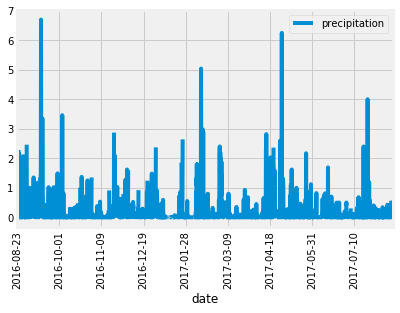

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns = ['date','precipitation'])
df.set_index(df['date'], inplace = True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation='vertical')

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

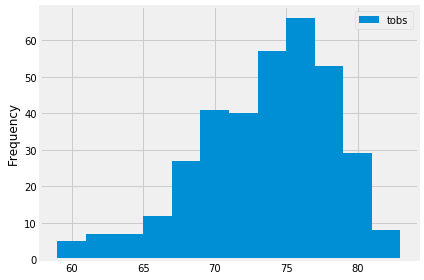

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns = ['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d'
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start, end):
    temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).all()           
    temp_list = list(np.ravel(temps))
    return temp_list

# Challenge

In [41]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [57]:
june_weather = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(func.extract('month', Measurement.date) == 6).all()

In [74]:
june_df = pd.DataFrame(june_weather, columns=['date', 'temp', 'prec'])
june_df.set_index(june_df['date'], inplace = True)
june_df = june_df.drop(columns = ['date'])
june_df

,temp,prec
date,,
2010-06-01,78.0,0.00
2010-06-02,76.0,0.01
2010-06-03,78.0,0.00
2010-06-04,76.0,0.00
2010-06-05,77.0,0.00
...,...,...
2017-06-26,79.0,0.02
2017-06-27,74.0,0.10
2017-06-28,74.0,0.02


In [75]:
june_df.describe()

,temp,prec
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


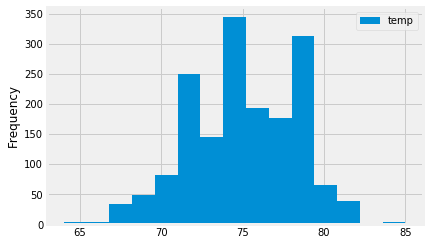

In [83]:
june_temp_df = june_df.drop(columns = ['prec'])
june_temp_df.plot.hist(bins = 15)

In [59]:
dec_weather = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(func.extract('month', Measurement.date) == 12).all()

In [77]:
dec_df = pd.DataFrame(dec_weather, columns=['date', 'temp', 'prec'])
dec_df.set_index(dec_df['date'], inplace = True)
dec_df = dec_df.drop(columns = ['date'])
dec_df

,temp,prec
date,,
2010-12-01,76.0,0.04
2010-12-03,74.0,0.00
2010-12-04,74.0,0.00
2010-12-06,64.0,0.00
2010-12-07,64.0,0.00
...,...,...
2016-12-27,71.0,0.14
2016-12-28,71.0,0.14
2016-12-29,69.0,1.03


In [78]:
dec_df.describe()

,temp,prec
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


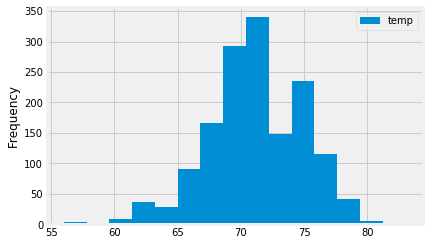

In [85]:
dec_temp_df = dec_df.drop(columns = ['prec'])
dec_temp_df.plot.hist(bins = 15)

# Weather analysis between June and December
The average temperature difference between the month of June compared to December is 4 degrees with the average temperature in June being 75 degrees and the average temperature in December being 71 degrees. The temperature range in June fluctuates from 64 to 85 degrees while the temperature in December fluctuates from 56 degrees to 83 degrees.In June, the temperature stays consistanly around 75 degrees, and although in December the temperature may get as low as 56 degrees, most of the time the temperature is around 70 degrees.
It would be interesting to look at the longitude and latitude to determine if the weather will indeed fluctuate drastically or stay relatively consisatant throughout the year.
Something else interesting to look at along with the temperature fluctuation throughout the year is the frequency of precipitation and see if there is a correlation to time of the year.

